In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
# from image import *
# from model import CSRNet
import torch
from tqdm import tqdm

<ipython-input-2-91f53741c523>:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [3]:
root = "/content/drive/MyDrive/Crowd_Counting_Data_Code/part_A_10_samples/"
Path_to_part_A= os.path.join(root,"train_data")
os.listdir(Path_to_part_A)
img_list = []
for elmt in os.listdir(Path_to_part_A):
  for imgs in os.listdir(os.path.join(Path_to_part_A,elmt)):
    if imgs.endswith(".jpg"):
        img_path = os.path.join(Path_to_part_A,elmt,imgs)
        # print(img_path)
        img_list.append(img_path)
print(len(img_list))  

10


## `Function to create density maps for images`

In [8]:
def gaussian_filter_density(gt):
  density = np.zeros(gt.shape,dtype=np.float32) #Density (713, 1024)
  gt_count = np.count_nonzero(gt)
  if gt_count == 0:
    return density

  pts = np.nonzero(gt)[1],np.nonzero(gt)[0]
  print("pts1",pts) # pts1 (array([222]), array([472]))
  pts = list(zip(np.nonzero(gt)[1],np.nonzero(gt)[0])) #[(222, 472)]
  print("pts2",pts) # pts2 [(222, 472)]
  pts = np.array(list(zip(np.nonzero(gt)[1],np.nonzero(gt)[0])))
  print("pts3",pts) # pts3 [[222 472]]


  # print("non zero",np.nonzero(gt)) #non zero (array([222]), array([472]))
  # non-zero element is located at row index 
  #472 and column index 222 in the gt array

  #The zip() function is used to combine these two arrays into a single array
  #of (column_index, row_index) tuples representing the coordinates of the 
  #non-zero elements in the gt array.

  leafsize = 2048
  # Build KD Tree
  tree = scipy.spatial.KDTree(pts.copy(),leafsize=leafsize)
  distances, locations = tree.query(pts,k=4) # [[ 0. inf inf inf]] [[0 1 1 1]]
  print("Distances and Locations",distances,locations)
  # return distances

  for i, pt in enumerate(pts):
    print("pt1 and pt0",pt[1],pt[0])
    pt2d = np.zeros(gt.shape,dtype=np.float32)
    print(pt2d.shape) #(713, 1024)
    pt2d[pt[1],pt[0]] = 1.
    print("pt2d",pt2d.shape)
    if gt_count > 1:
      sigma = (distances[i][1] +distances[i][2]+distances[i][3])*0.1 # [[ 0. inf inf inf]]
    else:
      sigma = np.average(np.array(gt.shape))/2./2. # The final result is the value of sigma, 
    #which is equal to half of the average of the height and width of the gt 
    #array, divided by 2
    density += scipy.ndimage.filters.gaussian_filter(pt2d,sigma,mode='constant')
  print("DONE")
  return density

In [7]:
for img_path in img_list:
  mat = img_path.replace('images','ground-truth').replace('IMG_','GT_IMG_').replace('.jpg','.mat')
  mat = io.loadmat(mat)
  gt = mat['image_info'][0,0][0,0][0]
  print("Ground Truth",gt.shape) #(number of people X 2)
  # Next we need to map this (number of people X 2) to size of image, for this we need to create numpy array with zeros (size = image size)
  img= plt.imread(img_path)
  map = np.zeros((img.shape[0], img.shape[1]))
  print("Shape of Image where Ground Truth need to superimpose",map.shape)
  # Next we need to check the points (map) lies inside the image or not
  for i in range(0, len(gt)):
    if int(gt[i][0]) < img.shape[0] and int(gt[i][1]) < img.shape[1]:
      map[int(gt[i][1]),int(gt[i][0])]=1 # Binary Masking equal to size of orignal image 
      print("Map",map.shape)
  map = gaussian_filter_density(map)
  with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'),'w') as hf:
      hf['density'] = map      

Ground Truth (707, 2)
Shape of Image where Ground Truth need to superimpose (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)
Map (713, 1024)


<ipython-input-6-b0acbe39b5af>:43: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  density += scipy.ndimage.filters.gaussian_filter(pt2d,sigma,mode='constant')


Streaming output truncated to the last 5000 lines.
pt1 and pt0 334 59
(536, 800)
pt2d (536, 800)
pt1 and pt0 335 73
(536, 800)
pt2d (536, 800)
pt1 and pt0 335 155
(536, 800)
pt2d (536, 800)
pt1 and pt0 335 199
(536, 800)
pt2d (536, 800)
pt1 and pt0 335 275
(536, 800)
pt2d (536, 800)
pt1 and pt0 335 444
(536, 800)
pt2d (536, 800)
pt1 and pt0 336 95
(536, 800)
pt2d (536, 800)
pt1 and pt0 337 463
(536, 800)
pt2d (536, 800)
pt1 and pt0 338 319
(536, 800)
pt2d (536, 800)
pt1 and pt0 339 3
(536, 800)
pt2d (536, 800)
pt1 and pt0 339 504
(536, 800)
pt2d (536, 800)
pt1 and pt0 340 306
(536, 800)
pt2d (536, 800)
pt1 and pt0 341 20
(536, 800)
pt2d (536, 800)
pt1 and pt0 344 170
(536, 800)
pt2d (536, 800)
pt1 and pt0 345 352
(536, 800)
pt2d (536, 800)
pt1 and pt0 347 270
(536, 800)
pt2d (536, 800)
pt1 and pt0 347 409
(536, 800)
pt2d (536, 800)
pt1 and pt0 347 463
(536, 800)
pt2d (536, 800)
pt1 and pt0 348 50
(536, 800)
pt2d (536, 800)
pt1 and pt0 349 382
(536, 800)
pt2d (536, 800)
pt1 and pt0 349 

**Visualization**

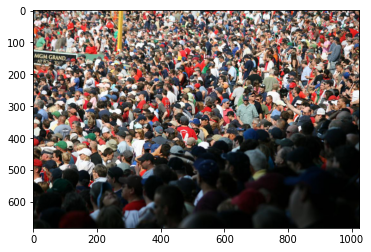

In [22]:
plt.imshow(Image.open(img_list[2]))

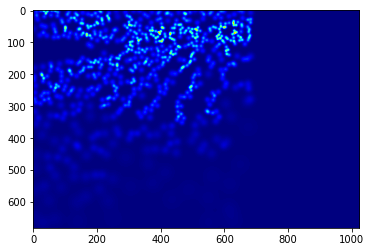

In [23]:
gt_file = h5py.File(img_list[2].replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)